# Task:
 -  Utworzenie prostego notatnika umożliwiającego: 
  * wygenerowanie syntetycznego zbioru danych
  * uruchomienie procesu uczenia
  * wizualizację tego procesu

---

In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Any, Tuple, Callable

In [87]:
import torch
from torch import nn, Tensor, FloatTensor
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter

In [88]:
# Custom modules
from src.data.generator import SyntheticDataGenerator
from src.networks.example_network import ExampleNeuralNetwork
from src.losses.mse import MSE
from src.utils import plot_loss

In [89]:
# Reproducible results
seed = 42
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)

In [95]:
# Create TB writter
writer = SummaryWriter(log_dir='tensorboard/')

In [96]:
# Generate data
num_points = 120
x, y = SyntheticDataGenerator().generate(num_points)
x, y = FloatTensor(x).reshape(num_points, 1), FloatTensor(y).reshape(num_points, 1)

In [97]:
# Load custom NN and Loss
model = ExampleNeuralNetwork()
criterion = MSE()

In [98]:
# Hyperparameters
learning_rate = 0.1
num_epochs = 512
optimizer = SGD(model.parameters(), lr=learning_rate)

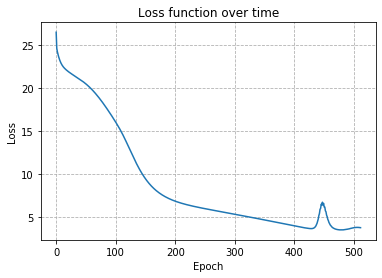

In [99]:
loss_values = []
for epoch in range(num_epochs):
    
    # Forward pass
    outputs = model(x)
    
    # Calculate loss
    loss = criterion(outputs, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save loss
    loss_values.append(loss.item())
    writer.add_scalar('Loss/train', loss.item(), epoch)
       
writer.close()
plot_loss(loss_values)